In [1]:
cd

/Users/keith_tetrad


In [19]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [3]:
uninfected = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-uninfected-1_counts.csv')
sample_4u8c_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio1-1_counts.csv')
sample_4u8c_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio2-1_counts.csv')
sample_4u8c_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-4u8c_bio2-2_counts.csv')
sample_Both_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Both_bio1-1_counts.csv')
sample_Both_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Both_bio2-1_counts.csv')
sample_C7_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio1-1_counts.csv')
sample_C7_B1T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio1-2_counts.csv')
sample_C7_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-C7_bio2-1_counts.csv')
sample_DMSO_B1T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio1-1_counts.csv')
sample_DMSO_B1T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio1-2_counts.csv')
sample_DMSO_B2T1 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio2-1_counts.csv')
sample_DMSO_B2T2 = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-DMSO_bio2-2_counts.csv')
sample_DMSO_B1_1X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_1X-1_counts.csv')
sample_DMSO_B1_5X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_5X-1_counts.csv')
sample_DMSO_B1_10X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio1_10X-1_counts.csv')
sample_DMSO_B2_1X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_1X-1_counts.csv')
sample_DMSO_B2_5X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_5X-1_counts.csv')
sample_DMSO_B2_10X = pd.read_csv('kw_dms/results/barcode_counts/LibB-231017-Spike_DMSO_bio2_10X-1_counts.csv')

In [4]:
sample_names = [
    "uninfected", 
    "sample_4u8c_B1T1", "sample_4u8c_B2T1", "sample_4u8c_B2T2",
    "sample_Both_B1T1", "sample_Both_B2T1",
    "sample_C7_B1T1", "sample_C7_B1T2", "sample_C7_B2T2",
    "sample_DMSO_B1T1", "sample_DMSO_B1T2", "sample_DMSO_B2T1", "sample_DMSO_B2T2",
    "sample_DMSO_B1_1X", "sample_DMSO_B1_5X", "sample_DMSO_B1_10X",
    "sample_DMSO_B2_1X", "sample_DMSO_B2_5X", "sample_DMSO_B2_10X"
]

In [5]:
# # Create a figure with subplots
# fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # Adjust as necessary
# fig.tight_layout(pad=5.0)

# # Iterate over each dataframe name and create a histogram
# for name, ax in zip(sample_names, axes.flatten()):
#     temp_df = globals()[name]  # Access the dataframe using its name
    
#     # Calculate the percentage of barcodes with count > 3
#     percentage = (temp_df['count'] > 3).mean() * 100
    
#     sns.histplot(data=temp_df, x='count', ax=ax, bins=30, kde=False)
#     ax.set_yscale('log')
#     ax.set_title(name)
#     ax.set_xlabel('Count')
#     ax.set_ylabel('Number of Barcodes')
    
#     # Add text displaying the percentage
#     ax.text(0.95, 0.95, f'{percentage:.2f}% Barcodes > 3 counts', 
#             transform=ax.transAxes, 
#             horizontalalignment='right', 
#             verticalalignment='top')


# #plt.savefig('barcode_histograms_big_bins.png')
# plt.show()

In [6]:
# # Sample groups
# sample_groups = [
#     ("sample_4u8c_B1T1", "sample_4u8c_B2T1", "sample_4u8c_B2T2"),
#     ("sample_Both_B1T1", "sample_Both_B2T1"),
#     ("sample_C7_B1T1", "sample_C7_B1T2", "sample_C7_B2T2"),
#     ("sample_DMSO_B1T1", "sample_DMSO_B1T2", "sample_DMSO_B2T1", "sample_DMSO_B2T2"),
#     ("sample_DMSO_B1_1X", "sample_DMSO_B1_5X", "sample_DMSO_B1_10X"),
#     ("sample_DMSO_B2_1X", "sample_DMSO_B2_5X", "sample_DMSO_B2_10X")
# ]

# for group_index, group in enumerate(sample_groups):
#     # Number of plots for the current group
#     num_plots = len(group) * (len(group) - 1) // 2

#     # Set up subplots
#     fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

#     # Counter for the subplot index
#     plot_index = 0

#     # Iterate tchrough each pair of samples
#     for i in range(len(group)):
#         for j in range(i + 1, len(group)):
#             # Merge the two dataframes on 'barcode'
#             merged_df = pd.merge(globals()[group[i]], globals()[group[j]], on='barcode', suffixes=('_left', '_right'))

#             # Define a function to determine the color based on the criteria
#             def determine_color(row):
#                 if row['count_left'] < 3 or row['count_right'] < 3:
#                     return '#5677A4'  # Color for invalid
#                 else:
#                     return '#E68B39'  # color for valid

#             # Apply the function to each row
#             colors = merged_df.apply(determine_color, axis=1)
            
#             # Plot
#             ax = axes[plot_index] if num_plots > 1 else axes
#             ax.scatter(merged_df['count_left'], merged_df['count_right'], c=colors)
#             ax.set_xlabel(f'{group[i]} Count')
#             ax.set_ylabel(f'{group[j]} Count')
#             ax.set_title(f'{group[i]} vs {group[j]}')
            
#             # Calculate the percentage of valid counts (>3) for each pair
#             valid_percentage = ((merged_df['count_left'] > 3) & (merged_df['count_right'] > 3)).mean() * 100
            
#             # Perform linear regression
#             X = sm.add_constant(merged_df['count_left'])
#             Y = merged_df['count_right']
#             model = sm.OLS(Y, X).fit()
#             r_squared = model.rsquared
#             predicted_values = model.predict(X)
            
#             # Display the valid percentage
#             ax.text(0.05, 0.90, f'{valid_percentage:.2f}% Valid Barcodes', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            
#             # Display R² value
#             ax.text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
#             ax.plot(merged_df['count_left'], predicted_values, color='black', linewidth=2)

#             plot_index += 1

#     plt.tight_layout()
#     plt.show()
    
#     # Constructing a unique filename for each figure
#     #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
#     #fig.savefig(filename, format='png')


In [7]:
df = pd.read_csv('/Users/keith_tetrad/kw_dms/results/variants/codon_variants.csv', usecols=['target','library','barcode','codon_substitutions','aa_substitutions','n_codon_substitutions','n_aa_substitutions'])

In [8]:
# Handle missing values in 'aa_substitutions'
df['aa_substitutions'].fillna('NoSubstitution', inplace=True)
df['aa_substitutions'].replace('', 'NoSubstitution', inplace=True)
# Handle missing values in 'codon_substitutions'
df['codon_substitutions'].fillna('NoSubstitution', inplace=True)
df['codon_substitutions'].replace('', 'NoSubstitution', inplace=True)

In [9]:
# Filter the dataframe by library
libA_df = df[df['library'] == 'LibA']
libB_df = df[df['library'] == 'LibB']
libC_df = df[df['library'] == 'LibC']

In [10]:
# Split the 'aa_substitutions' into a list if there are multiple substitutions
libB_df['aa_substitutions'] = libB_df['aa_substitutions'].str.split(' ')

# Explode the dataframe so that each aa substitution gets its own row
exploded_libB_df = libB_df.explode('aa_substitutions')

# Split the 'aa_substitutions' into a list if there are multiple substitutions
libB_df['aa_substitutions'] = libB_df['aa_substitutions'].str.split(' ')

#Group by AA substitutions and aggregate barcodes
aa_substitution_groups = exploded_libB_df.groupby('aa_substitutions')['barcode'].apply(list).reset_index()

# Rename columns for clarity
aa_substitution_groups.columns = ['AA Substitution', 'Barcodes']

# Explode the aa_substitution_groups dataframe
exploded_aa_substitution_groups = aa_substitution_groups.explode('Barcodes')

/var/folders/sv/w2n5lcb57zz70hk1l6tkkkf00000gp/T/ipykernel_61999/3149828436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libB_df['aa_substitutions'] = libB_df['aa_substitutions'].str.split(' ')
/var/folders/sv/w2n5lcb57zz70hk1l6tkkkf00000gp/T/ipykernel_61999/3149828436.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libB_df['aa_substitutions'] = libB_df['aa_substitutions'].str.split(' ')


In [11]:
def aggregate_aa_substitution_counts(aa_substitution_df, barcode_counts_df):
    """
    Aggregates counts for each amino acid substitution based on barcode counts.

    Parameters:
    aa_substitution_df (DataFrame): Dataframe of amino acid substitutions and associated barcodes.
    barcode_counts_df (DataFrame): Dataframe of barcodes and their counts.

    Returns:
    DataFrame: Aggregated counts for each amino acid substitution, sorted by total count.
    """
    # Merge with the barcode counts data
    merged_df = aa_substitution_df.merge(barcode_counts_df, left_on='Barcodes', right_on='barcode', how='left')

    # Aggregate the counts for each aa substitution
    aa_substitution_counts = merged_df.groupby('AA Substitution')['count'].sum().reset_index()

    # Rename columns for clarity
    aa_substitution_counts.columns = ['AA Substitution', 'count']

    # Sort by 'count' in descending order
    sorted_aa_substitution_counts = aa_substitution_counts.sort_values(by='count', ascending=False)

    return sorted_aa_substitution_counts

In [12]:
sample_names_aa = []  # List to store new dataframe names

for sample_name in sample_names:
    # Construct the name of the new dataframe
    new_df_name = sample_name + '_aa'

    # Dynamically call the function and assign the result to the new dataframe name
    globals()[new_df_name] = aggregate_aa_substitution_counts(exploded_aa_substitution_groups, globals()[sample_name])

    # Add the new dataframe name to the list
    sample_names_aa.append(new_df_name)

# sample_names_aa now contains the names of the new dataframes

In [13]:
print(sample_names_aa)

['uninfected_aa', 'sample_4u8c_B1T1_aa', 'sample_4u8c_B2T1_aa', 'sample_4u8c_B2T2_aa', 'sample_Both_B1T1_aa', 'sample_Both_B2T1_aa', 'sample_C7_B1T1_aa', 'sample_C7_B1T2_aa', 'sample_C7_B2T2_aa', 'sample_DMSO_B1T1_aa', 'sample_DMSO_B1T2_aa', 'sample_DMSO_B2T1_aa', 'sample_DMSO_B2T2_aa', 'sample_DMSO_B1_1X_aa', 'sample_DMSO_B1_5X_aa', 'sample_DMSO_B1_10X_aa', 'sample_DMSO_B2_1X_aa', 'sample_DMSO_B2_5X_aa', 'sample_DMSO_B2_10X_aa']


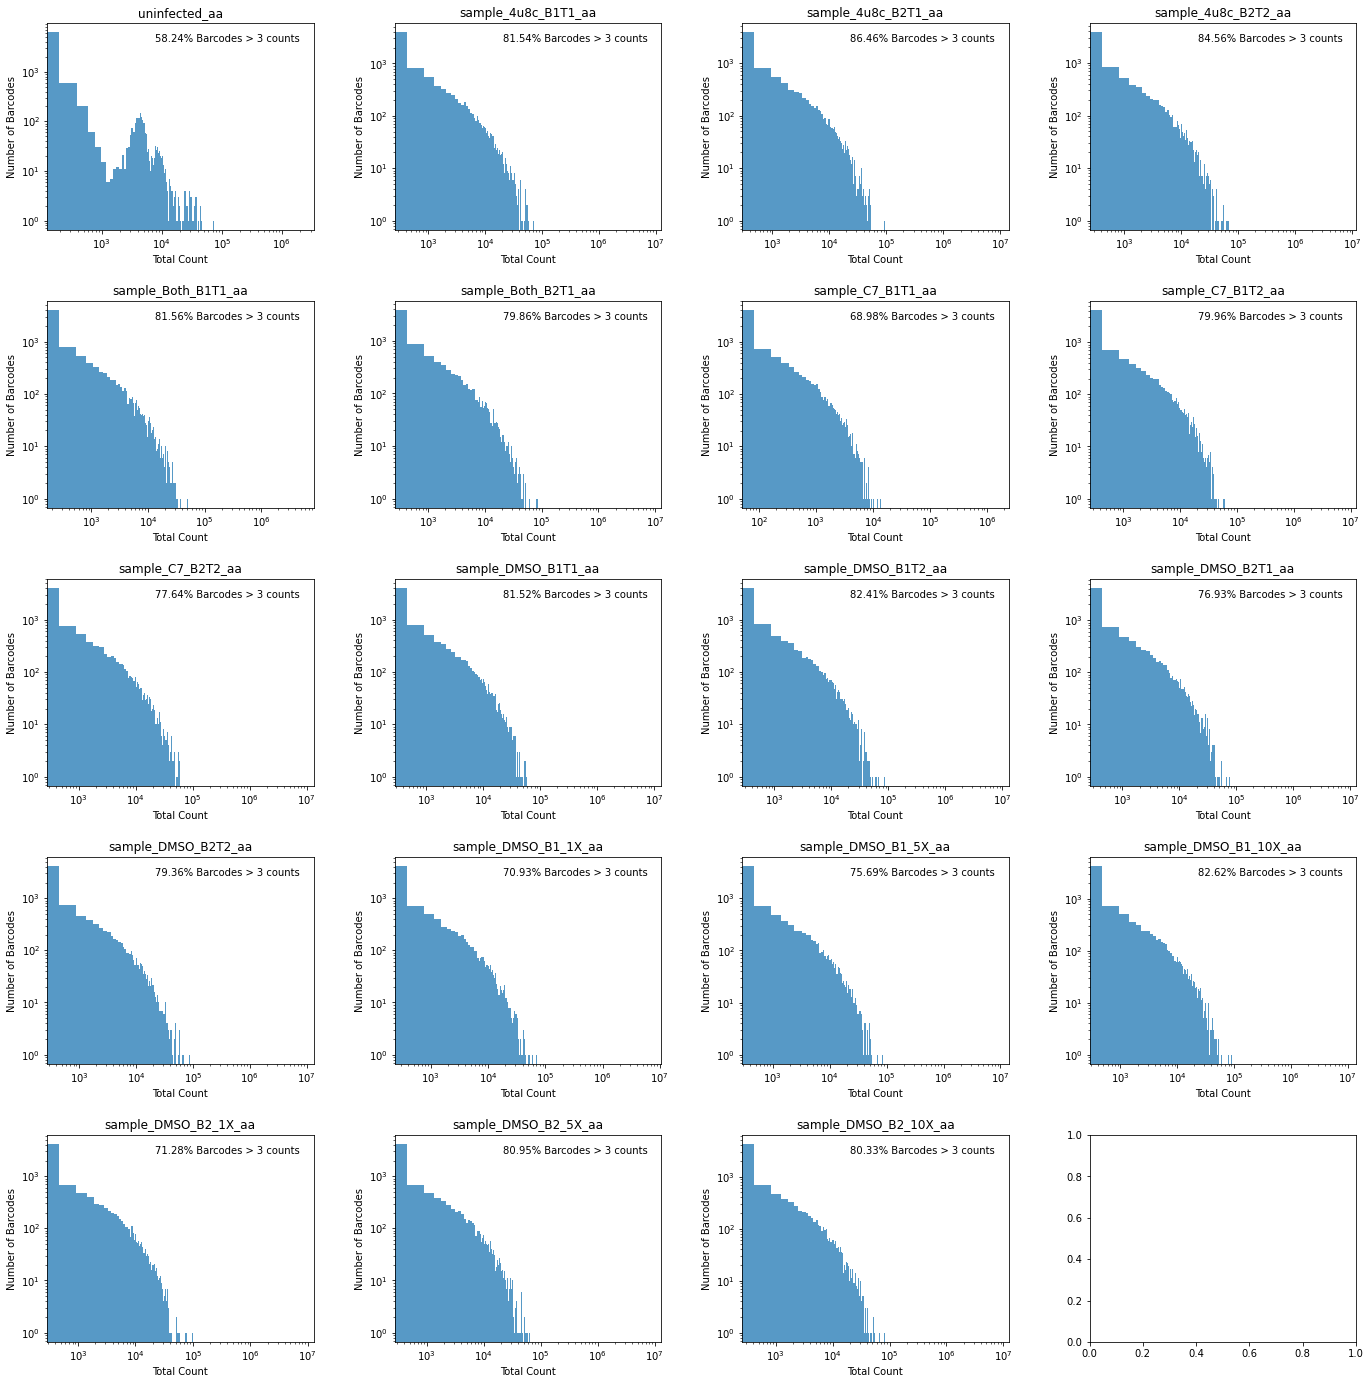

In [25]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))  # Adjust as necessary
fig.tight_layout(pad=5.0)

# Iterate over each dataframe name and create a histogram
for name, ax in zip(sample_names_aa, axes.flatten()):
    temp_df = globals()[name]  # Access the dataframe using its name
    
    # Calculate the percentage of barcodes with count > 3
    percentage = (temp_df['count'] > 25).mean() * 100
    
    sns.histplot(data=temp_df, x='count', ax=ax)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(name)
    ax.set_xlabel('Total Count')
    ax.set_ylabel('Number of Barcodes')
    
    # Add text displaying the percentage
    ax.text(0.95, 0.95, f'{percentage:.2f}% Barcodes > 3 counts', 
            transform=ax.transAxes, 
            horizontalalignment='right', 
            verticalalignment='top')


#plt.savefig('barcode_histograms_big_bins.png')
plt.show()

In [15]:
# Sample groups
sample_groups = [
    ("sample_4u8c_B1T1_aa", "sample_4u8c_B2T1_aa", "sample_4u8c_B2T2_aa"),
    ("sample_Both_B1T1_aa", "sample_Both_B2T1_aa"),
    ("sample_C7_B1T1_aa", "sample_C7_B1T2_aa", "sample_C7_B2T2_aa"),
    ("sample_DMSO_B1T1_aa", "sample_DMSO_B1T2_aa", "sample_DMSO_B2T1_aa", "sample_DMSO_B2T2_aa"),
    ("sample_DMSO_B1_1X_aa", "sample_DMSO_B1_5X_aa", "sample_DMSO_B1_10X_aa"),
    ("sample_DMSO_B2_1X_aa", "sample_DMSO_B2_5X_aa", "sample_DMSO_B2_10X_aa")
]

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/k

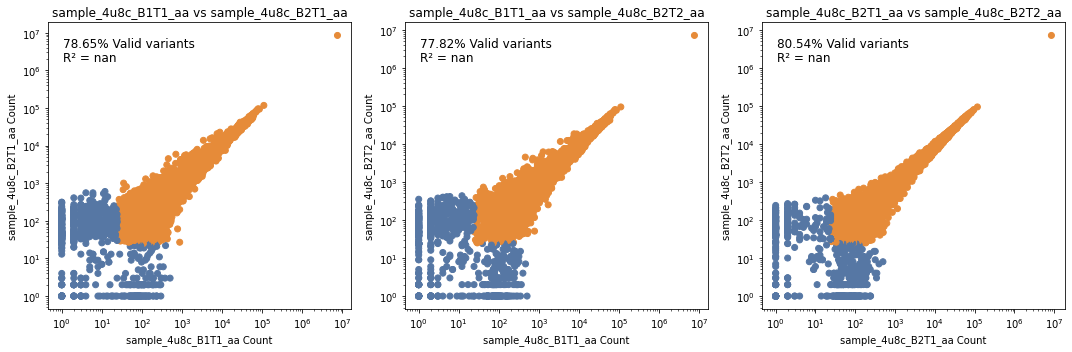

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


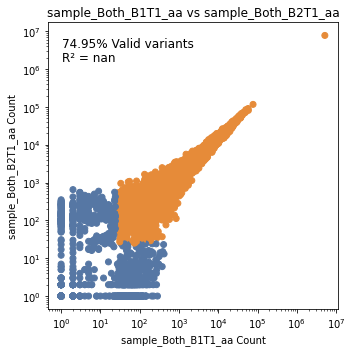

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/k

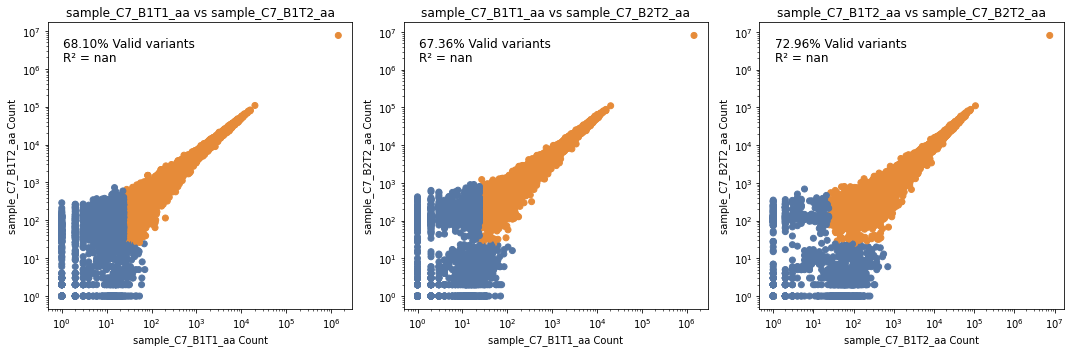

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/k

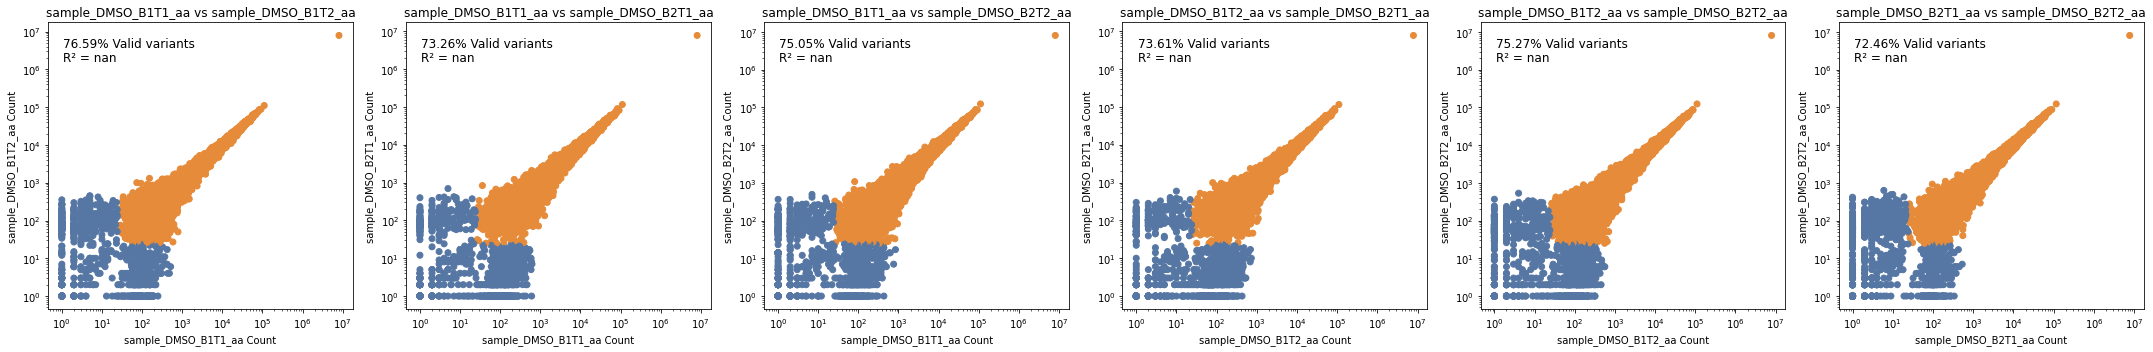

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/k

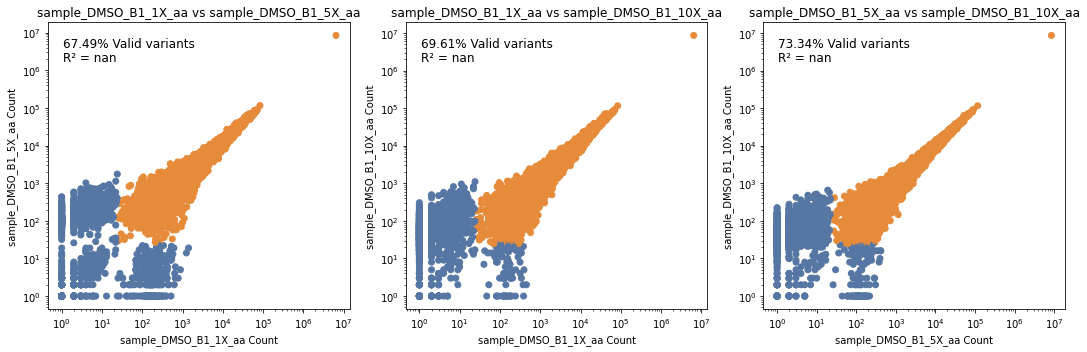

/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/keith_tetrad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/k

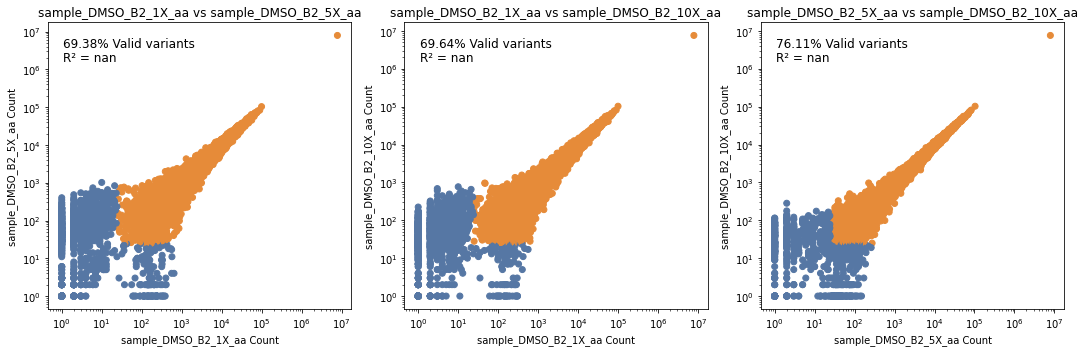

In [43]:
for group_index, group in enumerate(sample_groups):
    # Number of plots for the current group
    num_plots = len(group) * (len(group) - 1) // 2

    # Set up subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 5))

    # Counter for the subplot index
    plot_index = 0

    # Iterate tchrough each pair of samples
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            # Merge the two dataframes on 'barcode'
            merged_df = pd.merge(globals()[group[i]], globals()[group[j]], on='AA Substitution', suffixes=('_left', '_right'))

            # Define a function to determine the color based on the criteria
            def determine_color(row):
                if row['count_left'] < 25 or row['count_right'] < 25:
                    return '#5677A4'  # Color for invalid
                else:
                    return '#E68B39'  # color for valid

            # Apply the function to each row
            colors = merged_df.apply(determine_color, axis=1)
            
            # Plot
            ax = axes[plot_index] if num_plots > 1 else axes
            ax.scatter(merged_df['count_left'], merged_df['count_right'], c=colors)
            ax.set_xlabel(f'{group[i]} Count')
            ax.set_ylabel(f'{group[j]} Count')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(f'{group[i]} vs {group[j]}')
            
            # Calculate the percentage of valid counts (>3) for each pair
            valid_percentage = ((merged_df['count_left'] > 25) & (merged_df['count_right'] > 25)).mean() * 100

            # Display the valid percentage
            ax.text(0.05, 0.95, f'{valid_percentage:.2f}% Valid variants', transform=ax.transAxes, fontsize=12, verticalalignment='top')
            
            # Perform linear regression
            X = sm.add_constant(np.log(merged_df['count_left']))
            Y = np.log(merged_df['count_right'])
            model = sm.OLS(Y, X).fit()
            r_squared = model.rsquared

            # Plot the regression line
            predicted_values = np.exp(model.predict(X))
            ax.plot(np.sort(merged_df['count_left']), predicted_values[np.argsort(merged_df['count_left'])], color='black', linewidth=2)

            # Display R² value
            ax.text(0.05, 0.90, f'R² = {r_squared:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')

            plot_index += 1

    plt.tight_layout()
    plt.show()
    
    # Constructing a unique filename for each figure
    #filename = f'figure_{group_index+1}_{"_".join([name.split("_")[1] for name in group])}.png'
    #fig.savefig(filename, format='png')
